# Exercise 4.9 Task Part 2

## 1. Create a new notebook, import the necessary analysis and visualization libraries, then import your most up-to-date project data (i.e., the data set with your new customer data from the first part of this task).

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Turn project folder path into a string
path = r'C:\Users\Admin\Desktop\Data Analysis\Python\04-2024 Instacart Basket Analysis'

In [3]:
# Checking the path
path

'C:\\Users\\Admin\\Desktop\\Data Analysis\\Python\\04-2024 Instacart Basket Analysis'

In [4]:
# Import orders_products_customer_merge.pkl
ords_prods_cust_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customer_merge.pkl'))

In [5]:
# Checking the shape of ords_prods_cust_merge
ords_prods_cust_merge.shape

(32404289, 32)

In [6]:
# Checking the output of ords_prods_cust_merge
ords_prods_cust_merge.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,first_name,last_name,gender,state,age,date_joined,no_of_dependants,marital_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [7]:
# Droping the _merge columns
ords_prods_cust_merge = ords_prods_cust_merge.drop(columns = ['_merge'])

In [8]:
# Checking the output of ords_prods_cust_merge
ords_prods_cust_merge.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency,first_name,last_name,gender,state,age,date_joined,no_of_dependants,marital_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


## 2. If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.


### Done. Refer to '4.9 Intro to Data Visualization with Python.ipynb' file

## 3. You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
- In a markdown cell beneath your histogram, describe what the histogram demonstrates

Text(0.5, 0, 'Hour Of The Day')

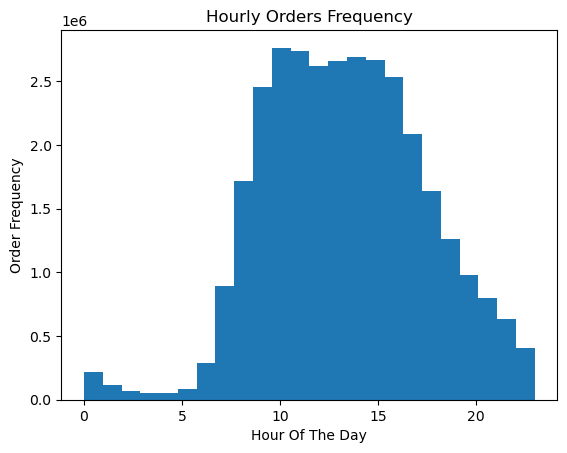

In [32]:
# Plot the histogram with the 'order_hour_of_day' column
hist = ords_prods_cust_merge['order_hour_of_day'].plot.hist(bins = 24)
plt.title('Hourly Orders Frequency')
plt.ylabel('Order Frequency')
plt.xlabel('Hour Of The Day')

### Histogram is plotted with 24 bins to represent each hour. We can see that the sales frequency start to increase from around 7 to 10. Sales peak periods is from 10 to 15. Sales frequency then starts to decrease from 15 to 23. 0 to 7 periods is the least busiest periods. 

### This conclude that customer generally start coming in around morning period and peak around late morning to mid afternoon, after which sales will start to slow down as it approaches evening period.

## 4. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

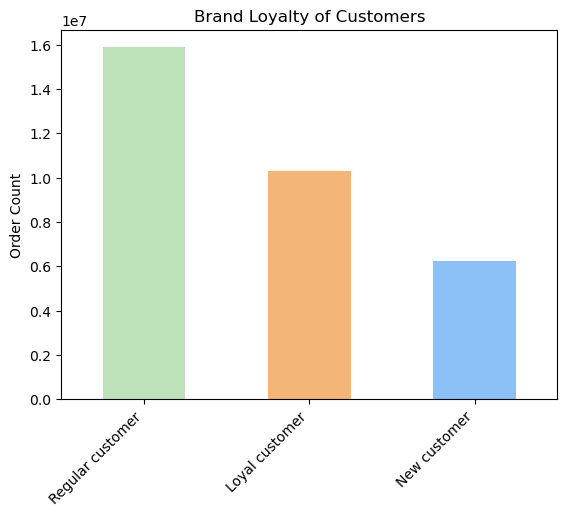

In [43]:
# Creating bar char for 'loyalty_flag' column
bar = ords_prods_cust_merge['loyalty_flag'].value_counts().plot.bar(color = ['#BDE2B9', '#F4B678', '#8BC1F7'])
plt.title('Brand Loyalty of Customers')
plt.ylabel('Order Count')
plt.xlabel('')
plt.xticks(rotation = 45, ha = 'right');

## 5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [11]:
# Create a random seed
np.random.seed(18)

In [12]:
# Sampling Data into 70:30
dev = np.random.rand(len(ords_prods_cust_merge)) <= 0.7

In [13]:
# Checking output of dev
dev

array([ True,  True, False, ...,  True,  True,  True])

In [14]:
# Split the devs into 2 data set - Store 70% of sample in big
big = ords_prods_cust_merge[dev]

In [15]:
# Split the devs into 2 data set - Store 30% of sample in small
small = ords_prods_cust_merge[~dev]

In [16]:
# Checking length of ords_prods_cust_merge
len(ords_prods_cust_merge)

32404289

In [17]:
# Checking if big + small adds up to length of ords_prods_merge
len(big) + len(small)

32404289

In [18]:
# Reducing sample to only column('order_hour_of_day', 'prices') needed for the chart
df_small = small[['order_hour_of_day','prices']]

In [35]:
# Checking output of df_small
df_small.head()

,order_hour_of_day,prices
2,12,9.0
4,15,9.0
5,7,9.0
7,14,9.0
11,16,9.0


C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


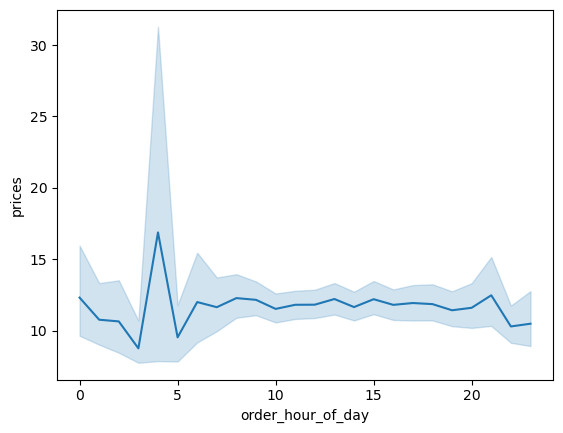

In [20]:
# Plotting the line chart for order_hour_of_day against prices for df_small sample dataset
line = sns.lineplot(data = df_small, x = 'order_hour_of_day', y = 'prices')

## 6. Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:
- In a markdown cell beneath your line chart, describe what the line chart shows.

In [21]:
# Reducing sample to only column('age', 'no_of_dependants') needed for the chart
df_small_2 = small[['age','no_of_dependants']]

In [22]:
# Checking output of df_small_2
df_small_2.head()

,age,no_of_dependants
2,31,3
4,31,3
5,31,3
7,31,3
11,69,0


C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


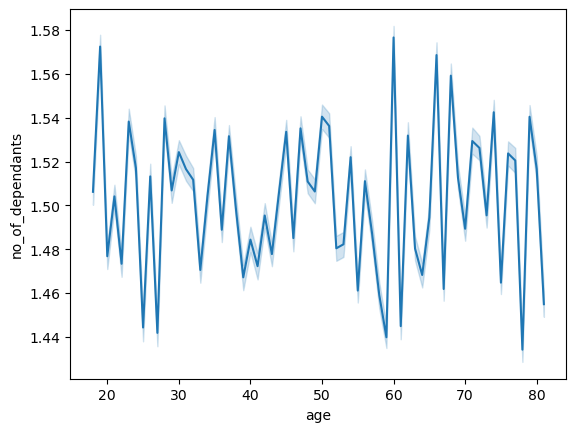

In [23]:
# Plotting the line chart for age against no_of_dependants for df_small_2 sample dataset
line_2 = sns.lineplot(data = df_small_2, x = 'age', y = 'no_of_dependants')

### Based on the line chart above, it seems that the number of dependants varies the same across the different age, thus no visible pattern is spotted for the connections between these 2 variables.

## 7. You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
- In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

In [24]:
# Reducing sample to only column('age', 'no_of_dependants') needed for the chart
df_small_3 = small[['age','income']]

In [25]:
# Checking output of df_small_3
df_small_3.head()

,age,income
2,31,40423
4,31,40423
5,31,40423
7,31,40423
11,69,54313


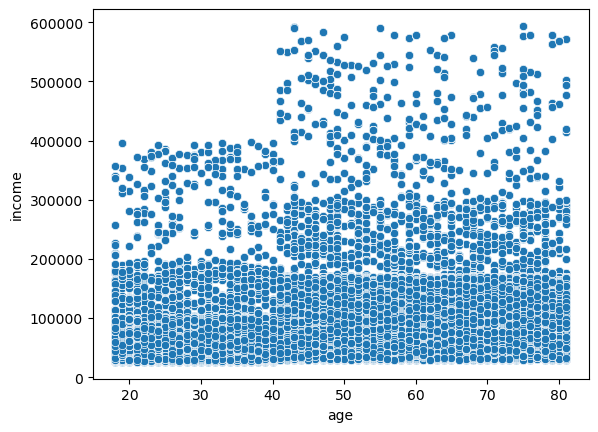

In [26]:
# Plotting the line chart for age against income for df_small_3 sample dataset
scatter = sns.scatterplot(x = 'age', y = 'income', data = df_small_3)

### From the scatterplot, i can see a visible pattern for the spending power('income') between the age group where spending power increase after age 40.

### People from age 20 to 40 seems to have a cap spending power of around 400000, with majority of people within this group being around 200000 or lower. 

### People from age 40 to 60 seems to have a cap spending power of around 600000, with majority of people within this group being around 200000 or lower. There is also a medium amount of people with spending power between 200000 to 300000.

## 8. Export your visualizations as “.png” files in your relevant project folder.

In [33]:
# Export histogram
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_order_hour_of_day.png'))

In [44]:
# Export bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_flag.png'), bbox_inches = 'tight')

In [29]:
# Export line chart (order_hour_of_day, price)
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_hour_price.png'))

In [30]:
# Export line chart (age, no_of_dependants)
line_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_dependants.png'))

In [31]:
# Export line chart (age, income)
scatter.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_age_income.png'))